## import needed Library and overview the data 

In [45]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read heart disease data from csv file
dataset = pd.read_csv('heartDisease.csv')
print(" ")
print(dataset.head())
print(" ")
print(dataset.isnull().sum())


 
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   
0   63    1   3       145   233    1        0      150      0      2.3      0  \
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


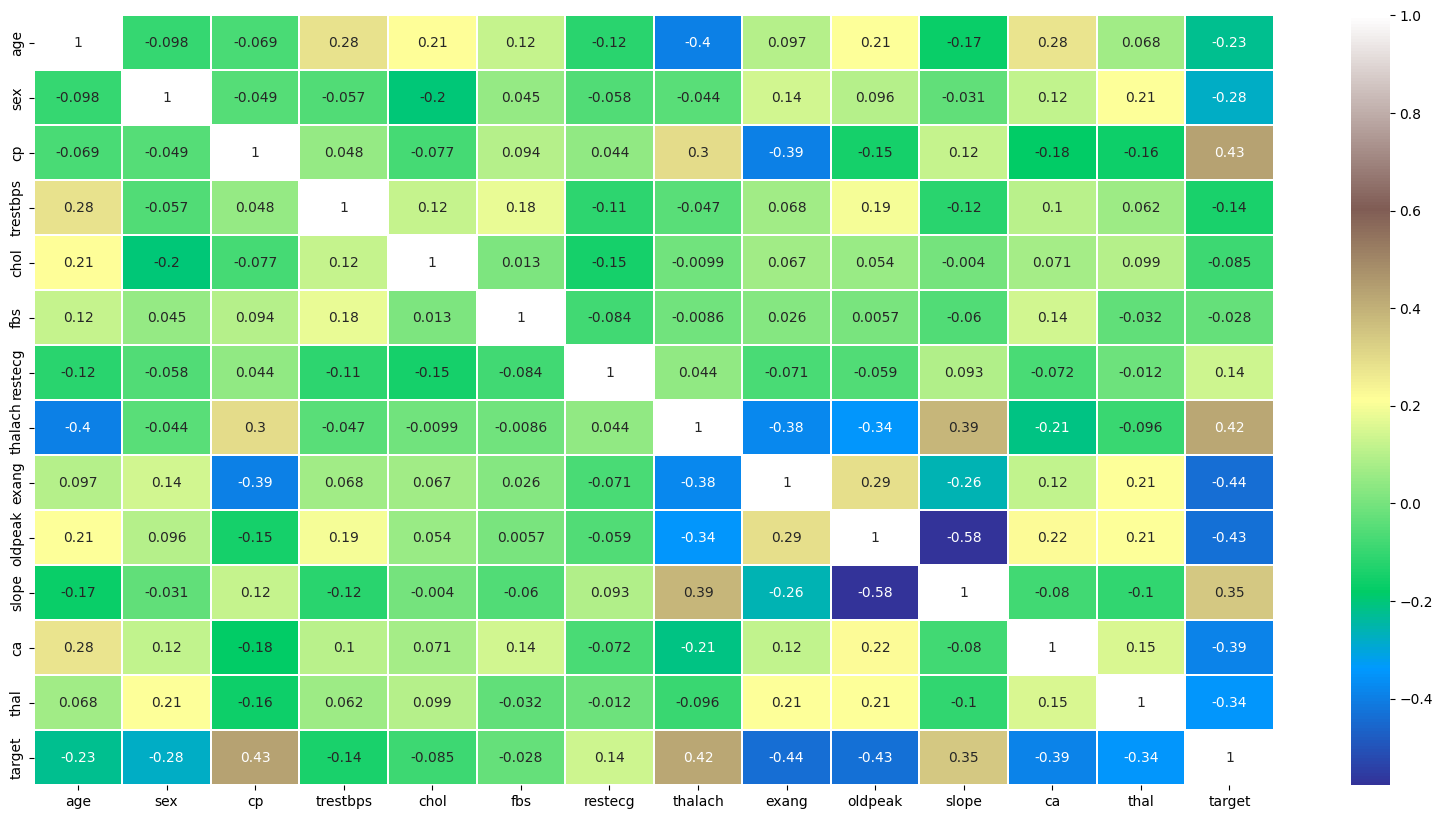

In [46]:
#find the corelation of each features using heatmap
# import seaborn as sns
# plt.figure(figsize=(20,10))
# sns.heatmap(dataset.corr(), annot=True, cmap='terrain', linewidths=0.1)
# plt.show()

## Split a dataframe 

In [47]:
#Split the data into features and target
#split dataset 
X = dataset.iloc[:, 0:13]
y = dataset.iloc[:, 13]


## Features Selection and Split the data set into Test and Train

In [48]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import pandas as pd

bestfeatures = SelectKBest(score_func=chi2, k=13)
fit = bestfeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']  # Rename the columns

top_features = featureScores.nlargest(13, 'Score')
print(top_features)

#use the top 6 features
X = dataset[['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']]
y = dataset.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


     Feature       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271
5        fbs    0.202934


## Use Standard Scaler

In [49]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree Machine Learning Model

In [50]:
#import libraries needed for Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# This library is for  determined the accuracy of the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn import tree

In [51]:
#find the best parameters for the model
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ['entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}]

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=parameters, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)


Best Accuracy: 81.83%
Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}


Accuracy for max depth 1: 0.8360655737704918
Accuracy for max depth 2: 0.7868852459016393
Accuracy for max depth 3: 0.7868852459016393
Accuracy for max depth 4: 0.8524590163934426
Accuracy for max depth 5: 0.8360655737704918
Accuracy for max depth 6: 0.8360655737704918
Accuracy for max depth 7: 0.8032786885245902
Accuracy for max depth 8: 0.7704918032786885
Accuracy for max depth 9: 0.7213114754098361
Accuracy for max depth 10: 0.7540983606557377


Text(0, 0.5, 'Accuracy')

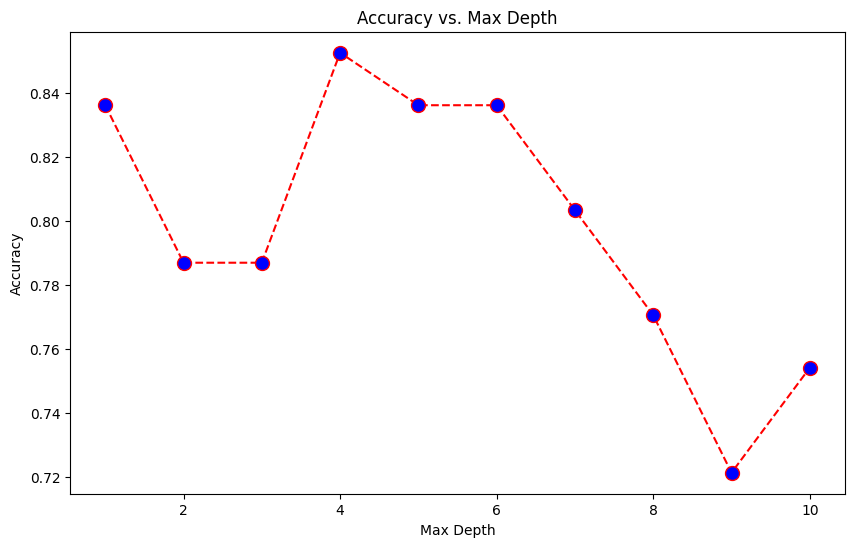

In [52]:
#test all the parameter values to find the higher accurancy using for loops and plot in graph 
accuracy = []
for i in range(1, 11):
    dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 0)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print("Accuracy for max depth {}: {}".format(i, accuracy_score(y_test, y_pred)))
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), accuracy, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

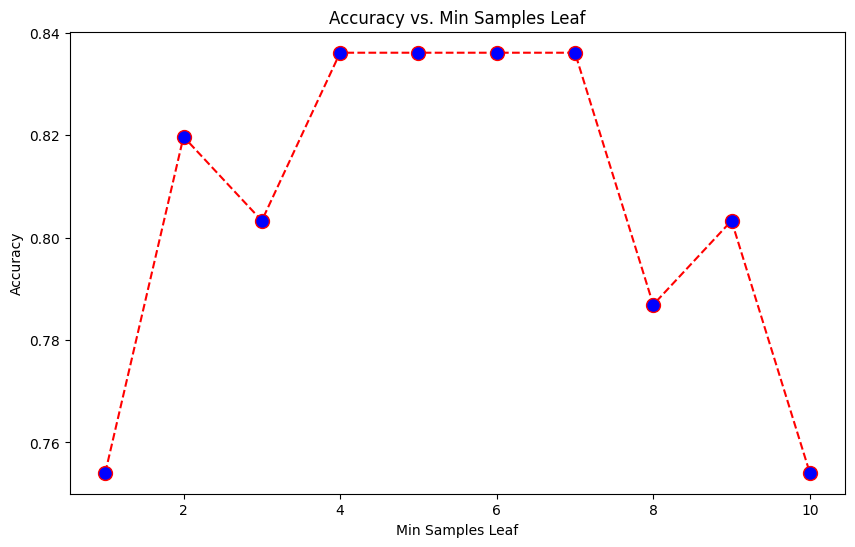

In [53]:
#find the best parameters min_samples_leaf usning for loops and plot in graph
accuracy = []
for i in range(1, 11):
    dtree = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = i, random_state = 0)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), accuracy, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy vs. Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')

In [54]:
#function to perform training with entropy
clf_entropy = DecisionTreeClassifier(criterion = 'entropy',min_samples_leaf = 7, random_state = 0)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=7, random_state=0)

In [55]:
#Predit Test Set
y_pred = clf_entropy.predict(X_test)
print(y_pred)


[0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [56]:
#Evaluate Model
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print("F1 Score: ", f1_score(y_test, y_pred, average='macro')*100)
print ('Recall:', recall_score(y_test, y_pred, average="weighted")*100)
print ('Precision:', precision_score(y_test, y_pred, average="weighted")*100)

print("")

#accurancy for training set
print("Training set score: {:.3f}".format(clf_entropy.score(X_train, y_train)*100))

#accurancy for test set
print("Test set score: {:.3f}".format(clf_entropy.score(X_test, y_test)*100))

#there is no overfitting or underfitting because the accurancy for training set and test set are almost the same

Confusion Matrix: 
[[26  3]
 [ 7 25]]
Accuracy:  83.60655737704919
F1 Score:  83.60215053763442
Recall: 83.60655737704919
Precision: 84.29494003264494

Training set score: 86.364
Test set score: 83.607


## K-NN Machine Learning 


In [57]:
#import library for KNN
from sklearn.neighbors import KNeighborsClassifier


Minimum error:- 0.09836065573770492 at K = 16


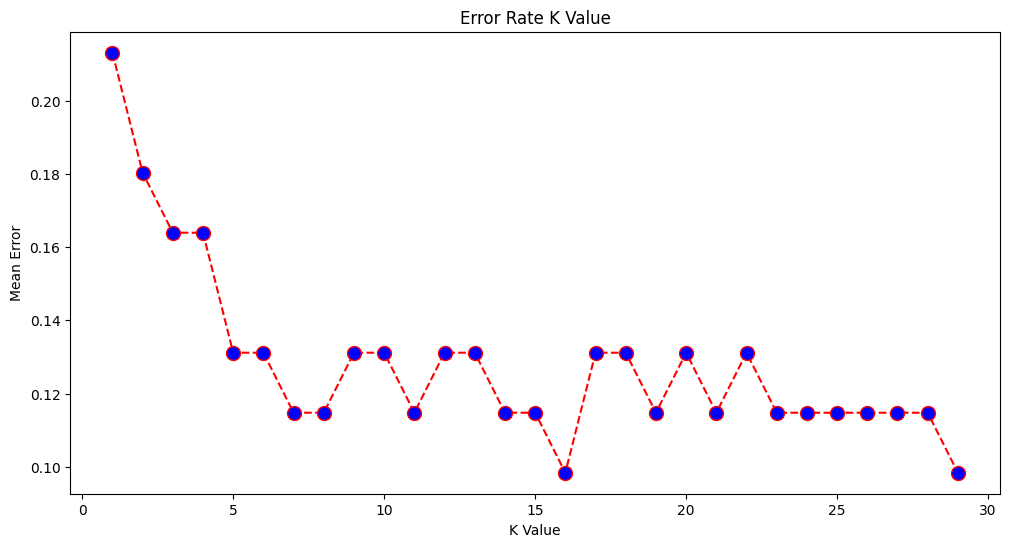

In [58]:
#finding the k value
error = []
k_range = range(1,25)
# Trying to find the error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

Text(0, 0.5, 'Testing Accuracy')

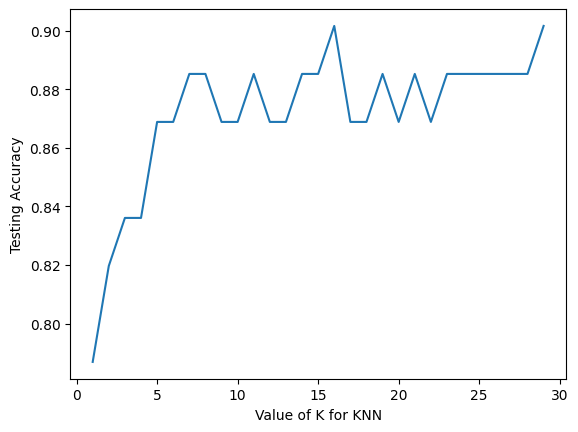

In [59]:
from sklearn import metrics
#Try running from k=1 through 30 and record testing accuracy
k_range = range(1,30)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [60]:
#Fit into MAchince Learning Model
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [61]:
#Evaluate Model
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print("F1 Score: ", f1_score(y_test, y_pred, average='macro')*100)
print ('Recall:', recall_score(y_test, y_pred, average="weighted")*100)
print ('Precision:', precision_score(y_test, y_pred, average="weighted")*100)

Confusion Matrix: 
[[25  4]
 [ 2 30]]
Accuracy:  90.1639344262295
F1 Score:  90.09740259740259
Recall: 90.1639344262295
Precision: 90.30679667130968


## SVM Machine Learning Model 

In [62]:
# Import library for Support Vector Machine (SVM) algorithm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [63]:
# Create a linear SVM classifier
model = SVC(kernel='linear', C=1)

In [64]:
# Fit the model to the training data
model = model.fit(X_train, y_train)

In [65]:
# Make predictions on the testing data
y_predict = model.predict(X_test)

In [66]:
# import libraries for evaluation of model
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test, y_predict)*100)
print ('Recall:', recall_score(y_test, y_predict, average="weighted")*100)
print ('Precision:', precision_score(y_test, y_predict, average="weighted")*100)
confusion = confusion_matrix(y_test, y_predict)
print('Confusion matrix:')
print(confusion)
print("F1 Score: ", f1_score(y_test, y_predict, average='macro')*100)

Accuracy: 86.88524590163934
Recall: 86.88524590163934
Precision: 86.88524590163934
Confusion matrix:
[[25  4]
 [ 4 28]]
F1 Score:  86.85344827586206
